# Exercises  "Lecture 10: Clustering"

In this set of exercises, we will use clustering to group the wikipedia articles into 16 clusters. Since we are working on clustering (unsupervised machine learning),  we will ignore the labels (the category of the article) when training. We will use them however to evaluate the trained model (intrinsic evaluation).


The exercises cover the following points:

* Storing the data into an pandas dataframe and inspecting the data
* Learning a clustering model from the data 
* Inspecting the output clusters

Data: wkp_sorted.zip      

Python libraries
- sklearn.datasets to load data 
- pandas
- numpy unique method to remove duplicate   

Cheat sheets
- 10_CS_clustering.ipynb


##  Loading the Data into a Dataframe

**Exercise 1** 

* Create a pandas dataframe containing two columns one for the text and one for the category of each Wikipedia article included in  "data/wkp_sorted/". 
* Use sklearn.datasets load_files method (cf. **clustering CS**) 

In [2]:
import pandas as pd
from sklearn.datasets import load_files
# Loading all files in "dir" directory into a pandas dataframe
DATA_DIR = "wkp_sorted/"
data = load_files(DATA_DIR, encoding="utf-8", decode_error="replace")
df = pd.DataFrame({'text': data['data'], 'label': data['target']})
df.head()

,text,label
0,The Cardiff Roller Collective (CRoC) are a rol...,11
1,"""Go! Pack Go!"" is the fight song of the Green ...",11
2,Al-Machriq (English translation: The East) was...,14
3,Ajman International Airport (Arabic: مطار عجما...,0
4,Kapla is a construction set for children and a...,4


In [4]:
df.shape

(160, 2)

**Exercise 2**  

* Add a new column to your dataframe with header "Headers" in which you include the headers extracted from the texts
* Use the code you developed in Exercise 3 of 10_Exercise_sheet_stats.ipynb

In [5]:
import re
def get_headers(text):
    headers = re.findall(r'=+ (\w+) =+',text)
    return " ".join(headers)

headers = df["text"].apply(get_headers)
h = pd.Series(headers,name="headers")
hdf = pd.concat([df,h],axis = 1)
hdf

,text,label,headers
0,The Cardiff Roller Collective (CRoC) are a rol...,11,References
1,"""Go! Pack Go!"" is the fight song of the Green ...",11,References
2,Al-Machriq (English translation: The East) was...,14,Bibliography References
3,Ajman International Airport (Arabic: مطار عجما...,0,Location History Operations Facilities Regulat...
4,Kapla is a construction set for children and a...,4,History Assembly Varieties References
...,...,...,...
155,Memphis Air Route Traffic Control Center (ZME)...,0,References
156,Al-Haj Suliman Yari (19 August 1936 – 10 May 2...,10,References
157,Sapphire Stagg is a fictional character appear...,6,References
158,Relocation of professional sports teams occurs...,11,Baseball Basketball References


**Exercise 3** 

* How many articles are there ? Use the dataframe shape attribute which outputs the shape (nb of rows and columns) of a dataframe.

In [6]:
df.shape

(160, 2)

**Exercise 4** 

* How many labels (categories) are there ?
* Use numpy unique method (cf. numpy CS)

In [7]:
import numpy as np
nb_categories = np.unique(df["label"]).shape[0]

In [8]:
print("There are "+str(nb_categories)+" categories")

There are 16 categories


**Exercise 5** 

* How many articles per category ?
* Use pandas 'groupby' and 'size' methods (cf. Pandas CS)

In [9]:
# size of each group
print(df.groupby('label').size())

label
0     10
1     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
9     10
10    10
11    10
12    10
13    10
14    10
15    10
dtype: int64


**Exercise 6** 

* Don't forget to shuffle the data (Cf. pandas CS)

In [10]:
from sklearn.utils import shuffle
df = shuffle(df)

## Vectorizing the input texts

$Y$ = the categories (Astronaut, etc.) we are aiming to rediscover. These are **not** used for clustering but they will be used for evaluation

$X$ = the features used for clustering. The features of Wikipedia article is the list of tokens contained in that item. We hope that words can help group the articles into 16 clusters matching the Wikipedia categories.


In [11]:
# Defining X and Y
X = hdf['text']
Y = hdf['label']
X.head()

0    The Cardiff Roller Collective (CRoC) are a rol...
1    "Go! Pack Go!" is the fight song of the Green ...
2    Al-Machriq (English translation: The East) was...
3    Ajman International Airport (Arabic: مطار عجما...
4    Kapla is a construction set for children and a...
Name: text, dtype: object

**Exercise 7** 

* Vectorize the input (X)
* Use sklearn [TfidfVectorizer]( https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) method to turn the Wikipedia articles into a TF-IDF matrix where each row represents a news item, the columns are tokens and the cell contains the tf-idf score of each token.

Three steps
* Import the TfidfVectorizer method from sklearn
* Create a tf-idf vectorizer. The maximum nb of features should be set to 500. Set use_idf to True and stop_words to "english".
* Apply the tfidf_vectorizer.fit_transform method to X to vectorize all input texts

In [12]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 300.7 kB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.3 MB/s eta 0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.0/777.0 kB 6.9 MB/s eta 0:00:000m eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

# Using TFIDF vectorizer to convert convert words to Vector Space
tfidf_vectorizer = TfidfVectorizer(max_features=500,
                                       use_idf=True,
                                       stop_words='english')
                                       #tokenizer=nltk.word_tokenize)
#                                       ngram_range=(1, 2))

# Fit the vectorizer to text data
tfidf_matrix = tfidf_vectorizer.fit_transform(X)


**Exercise 8** 

* Print out the features created by the vectorizer (use the get_feature_names() method).

In [14]:
features = tfidf_vectorizer.get_feature_names_out()
print(features)

['000' '10' '100' '11' '12' '13' '14' '15' '16' '17' '18' '19' '20' '2000'
 '2001' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011'
 '2012' '2013' '2014' '2015' '2017' '2018' '2019' '21' '22' '24' '30'
 '500' 'according' 'act' 'activities' 'africa' 'african' 'age' 'air'
 'aircraft' 'airlines' 'airport' 'airports' 'airspace' 'ajman' 'al'
 'aldrin' 'america' 'american' 'anti' 'apollo' 'appeared' 'appears'
 'april' 'arab' 'arabic' 'area' 'areas' 'army' 'art' 'associated'
 'association' 'astronaut' 'atmospheric' 'attack' 'attacks' 'august'
 'authority' 'avengers' 'aviation' 'award' 'away' 'base' 'based' 'beacon'
 'began' 'believed' 'best' 'board' 'body' 'born' 'bread' 'britain'
 'british' 'building' 'built' 'burial' 'bus' 'business' 'california'
 'called' 'canada' 'cannonball' 'captain' 'career' 'caste' 'castes'
 'cement' 'cemetery' 'center' 'central' 'centre' 'century' 'certain'
 'channel' 'character' 'check' 'chief' 'children' 'china' 'chinese' 'city'
 'class' 'club' 'coast

##  Training a K-means clustering model

**Exercise 9**

* Create a K-means object (import KMeans from sklearn.cluster). 
* Set the number of clusters to 16
* Train this object on the tf-idf matrix you created from the data (use the kmeans fit method)

In [15]:
from sklearn.cluster import KMeans

# Kmeans++
km = KMeans(n_clusters=16, init='k-means++', max_iter=300, n_init=5, verbose=0, random_state=3425)
km.fit(tfidf_matrix)
# cluster assignement (list showing the cluster assigned to each instance)
predicted_labels = km.labels_
clusters = predicted_labels.tolist()

In [16]:
print(predicted_labels[0:10])

[11 11  1 12 15  4  4 14  8 15]


## Inspecting Clustering Results

**Exercise 10** 

* Create a dataframe aligning the clustering results with the news items and their category
* The dataframe should contains 3 columns with headers "Text", "Category" and "Cluster"
* Extract the texts and labels from the dataframe you created from the wikipedia files
* Extract the list of cluster labels produced for each input text by the clustering algorithm (km.labels_)
* Create the required dataframe using these information 

In [17]:
# Print out id, title, category and cluster assignment
texts = df['text'].values
labels = df['label'].values

data = {'text':texts,'label':labels,'cluster':clusters}
df = pd.DataFrame(data,columns=['text','label','cluster'])
df

,text,label,cluster
0,Spanish artist that was born in Alicante (Spai...,1,11
1,John Akii-Bua (3 December 1949 – 20 June 1997)...,12,11
2,Astrup Rectory (Danish: Astrup Præstegård) is ...,4,1
3,Anti-shock body is the name given by Richard T...,13,12
4,The Al Jazeera effect is a term used in politi...,7,15
...,...,...,...
155,Aisam-ul-Haq Qureshi is a professional tennis ...,12,7
156,"Alan Kurdi, named after the drowned Syrian chi...",13,4
157,Židlochovice (Czech pronunciation: [ˈʒɪdloxovɪ...,5,8
158,"Akira Ryō (梁 明, Ryō Akira) (born October 20, 1...",12,11


**Exercise 11** 

* Print out the number of items per clusters
* use pandas value_counts() method

In [18]:
# Print out number of items per clusters
df['cluster'].value_counts()

cluster
8     29
1     16
4     15
9     13
3     12
14    11
11    10
7     10
5      9
10     7
2      7
12     6
13     5
6      5
15     4
0      1
Name: count, dtype: int64

**Exercise 12** 

* Evaluate the clusters
* Import metrics from sklearns and compute homogeneity, completeness, v_measure, adjusted rand index and silhouette coefficient
* Print each score out

In [19]:
# Evaluate the clusters
from sklearn import metrics
print( labels)
print( km.labels_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(tfidf_matrix, km.labels_, sample_size=1000))

print()

[ 1 12  4 13  7 14  2 13  9 14  7  0 11  0  7  3  8  5  7  2 11  1 10 12
 11  3  9  9  5  1  0  4  5 14  6  1 10 15  2  8  6  7  5  0  3 15 14  2
 14 11  4  0  6 10 12  9 10 15  4  7 13 14  4 10 12 11  9  5  3  2  7  6
  4 12  0 14 15  0 11  3  0 12  5 12 10  6 15 15 13  5  2  7  9  4 10  6
  3  3  5 10  8 10 11  2  5 13  8 14  4 10  0  1  6 11  1 14 15  3  4  9
  1 11  6  7  1  9 15 13  8  2  0  3 15  8 13  8  8  9 15  4  3 12  8 13
 14  8  2  7  1  1  6  2  9  6 13 12 13  5 12 11]
[11 11  1 12 15  4  4 14  8 15  9 15  3  9  9  9  4  1 14 13  0  5  5  3
 10 10  9 14 13  8  1  3  5  8  8  2 13  8  1  4 14  3 11  1 11  9  3  3
 11 14  5  4  8  1  8  8  2  4 12  7 14  7  6  8  9  1  9  4  9  4  8  8
  4  9  8  5  8 14  7 14  1  1  3  9  3  8  2  5  2 12  1  1 13  8  2 14
  8  8 11  8  8 15  7  7  8  4 10  5  7  1  8 12  7  9  4 14 12  4  8 11
  8 10  7  4  1 11 12 10  3  6  8  4 11  9  3  3  8  5  6  6  1  2  2  3
 13  1  1 10  5  8  8  6  8 10 14  7  4  8 11  7]
Homogeneity: 0.269
Compl

**Exercise 13**  

* Print out the top 50 words of each cluster 

In [20]:
# Top terms per cluster
print("Top terms per cluster:")
true_k = np.unique(labels).shape[0]
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :100]:
        print(' %s' % terms[ind], end='')
    print('\n')

Top terms per cluster:
Cluster 0: merlin king century story english version later known based early post popular character powers having named works son young burial eventually modern great include england britain called earlier written middle life british does including long series town form stated come work born usually father originally time house man just old original war wrote end section round did university court believed living person isbn kingdom prior power location included site various associated final event taken chief new different death north said events john major set order times second people en influence effect students stars appears women opening placed common men head

Cluster 1: al newspaper published arabic paper building hotel stohlman arab government important references history press based chief party leather official appears links 2011 external december series january following members organization international founded russian community university established

## Visualizing  clusters.

Provided


In [21]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array 

MDS()

# n_components=2 to plot results in a two-dimensional plane
# "precomputed" because the  distance matrix dist is already computed
# `random_state` set to 1 so that the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

/home/claire/anaconda3/envs/env803/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [25]:
#set up colors per clusters using a dict
# #1b9e77 (green) #d95f02 (orange) #7570b3 (purple) #e7298a (pink)
cluster_colors = {0: '#f0140c', 1: '#ad7144', 2: '#f5b92f', 3: '#e8f007', 4: '#88e014', \
                  5:"#0eedb2", 6:"#0dafdb", \
                  7:"#1330ed", 8:"#9a09e8", 9:"#e605b1", 10:"#c4a29d", 11:"#695232", 12:"#f7f088", 13:"#7e8778", \
                  14:"#7dada2", 15:"#628cf5"}

#set up cluster names using a dict
#cluster_names = {0: 'techno'}


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

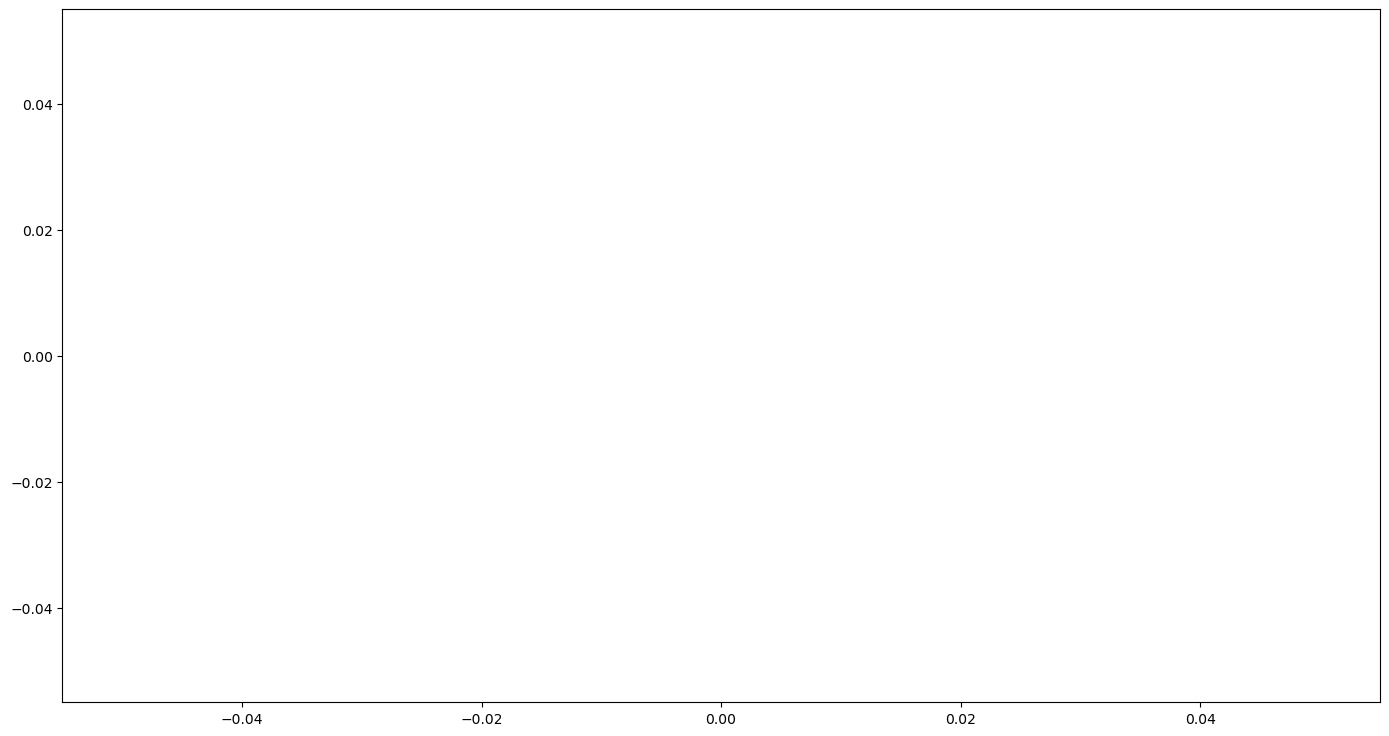

In [26]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
        #    label=cluster_names[name], 
            color=cluster_colors[name]) 
        #    mec='non')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelleft=False)
    
ax.legend(numpoints=1)  #show legend with only 1 point
    
    
plt.show() #show the plot
